In [1]:
%matplotlib inline

In [2]:
import sys
sys.dont_write_bytecode = True
import seaborn as sns
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
from ggplot import *
from dataMethods import *
from testRuns import *
import pandas as pd
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
dataColumns = ['lHR', 'rHR', 'wHR', 'lK', 'rK', 'wK', 'lfaR', 'rfaR', 'wfaR', 'lHitRT', 'rHitRT', 'wHitRT', 'lFaRT'
               , 'rFaRT', 'wFaRT', 'ldP', 'rdP', 'wdP', 'lCrit', 'rCrit', 'wCrit']

In [4]:
def createDF(testRuns):
    data = pd.DataFrame()
    i = 0
    for (s,r) in testRuns:
        stats = extractPerformance(s,r,'behav5')
        leftHRs = stats['lHRs']
        rightHRs = stats['rHRs']
        wholeHRs = stats['wHRs']
        leftKs = stats['lKs']
        rightKs = stats['rKs']
        wholeKs = stats['wKs']
        leftfaRates = stats['lfaRates']
        rightfaRates = stats['rfaRates']
        wholefaRates = stats['wfaRates']
        leftHitRTs = stats['lHitRTs']
        rightHitRTs = stats['rHitRTs']
        wholeHitRTs = stats['wHitRTs']
        leftFaRTs = stats['lFaRTs']
        rightFaRTs = stats['rFaRTs']
        wholeFaRTs = stats['wFaRTs']
        leftdPs = stats['ldPs']
        rightdPs = stats['rdPs']
        wholedPs = stats['wdPs']
        leftCrits = stats['lCrits']
        rightCrits = stats['rCrits']
        wholeCrits = stats['wCrits']
        for key in HFconds:
            row = pd.Series([leftHRs[key],rightHRs[key], wholeHRs[key], leftKs[key], rightKs[key],
                             wholeKs[key], leftfaRates[key], rightfaRates[key], wholefaRates[key],
                            leftHitRTs[key], rightHitRTs[key], wholeHitRTs[key], leftFaRTs[key], 
                              rightFaRTs[key], wholeFaRTs[key], leftdPs[key], rightdPs[key], 
                              wholedPs[key], leftCrits[key], rightCrits[key], wholeCrits[key]],
                            name = str(i), index=dataColumns)
            row['targs'] = str(HFconds[key][0])
            row['dists'] = str(HFconds[key][1])
            row['subj'] = int(s)
            row['run'] = int(r)
            data = data.append(row)
            i += 1
    return data

In [5]:
pilotData = createDF(pilotTestRuns)
pilotData['lK']

0    0.866667
1    0.724138
2    0.806452
3    1.520000
4    1.333333
5    0.727273
Name: lK, dtype: float64

In [6]:
pilotData['rK']

0    0.800000
1    0.793103
2    0.677419
3    1.040000
4    0.933333
5    0.181818
Name: rK, dtype: float64

In [7]:
pilotData['lHR']

0    0.8750
1    0.7500
2    0.8125
3    0.8125
4    0.6875
5    0.5625
Name: lHR, dtype: float64

In [8]:
pilotData['rHR']

0    0.8125
1    0.8125
2    0.6875
3    0.6250
4    0.5000
5    0.3750
Name: rHR, dtype: float64

In [9]:
pilotData['lfaR']

0    0.06250
1    0.09375
2    0.03125
3    0.21875
4    0.06250
5    0.31250
Name: lfaR, dtype: float64

In [10]:
pilotData['rfaR']

0    0.06250
1    0.09375
2    0.03125
3    0.21875
4    0.06250
5    0.31250
Name: rfaR, dtype: float64

In [17]:
pilotData

,dists,lCrit,lFaRT,lHR,lHitRT,lK,ldP,lfaR,rCrit,rFaRT,...,run,subj,targs,wCrit,wFaRT,wHR,wHitRT,wK,wdP,wfaR
0,0,0.191886,0.520580,0.8750,0.445376,0.866667,2.684470,0.06250,0.323487,0.478443,...,1.0,3.0,1,0.262065,0.820718,0.84375,0.503630,0.833333,2.544111,0.06250
1,1,0.321761,0.502912,0.7500,0.519894,0.724138,1.992501,0.09375,0.215432,0.553999,...,1.0,3.0,1,0.270795,0.585162,0.78125,0.502690,0.758621,2.094433,0.09375
2,2,0.487793,0.594815,0.8125,0.520733,0.806452,2.749878,0.03125,0.686978,0.520769,...,1.0,3.0,1,0.594121,0.921727,0.75000,0.550870,0.741935,2.537222,0.03125
3,0,-0.055362,0.553176,0.8125,0.452627,1.520000,1.663568,0.21875,0.228891,0.477889,...,1.0,3.0,2,0.098645,0.586226,0.71875,0.487326,1.280000,1.355554,0.21875
4,1,0.522672,0.552056,0.6875,0.584561,1.333333,2.022897,0.06250,0.767060,0.570047,...,1.0,3.0,2,0.648459,0.419441,0.59375,0.604046,1.133333,1.771323,0.06250
5,2,0.165733,0.551851,0.5625,0.585817,0.727273,0.646087,0.31250,0.403708,0.553080,...,1.0,3.0,2,0.283594,0.520714,0.46875,0.585817,0.454545,0.410364,0.31250


(0, 2)

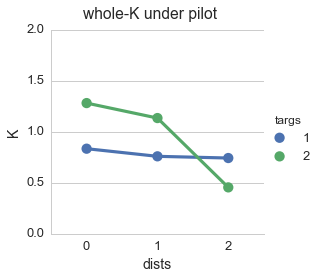

In [11]:
pilotWKPlot = sns.factorplot(data=pilotData,x='dists',y='wK',hue='targs')
pilotWKPlot.fig.suptitle('whole-K under pilot')
pilotWKPlot.set_axis_labels('dists', 'K')
pilotWKPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2)

(0, 2)

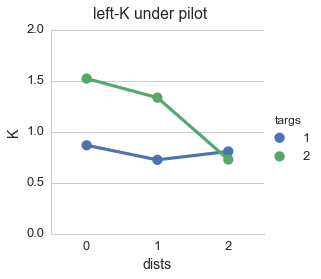

In [12]:
pilotLKPlot = sns.factorplot(data=pilotData,x='dists',y='lK',hue='targs')
pilotLKPlot.fig.suptitle('left-K under pilot')
pilotLKPlot.set_axis_labels('dists', 'K')
pilotLKPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2)

(0, 2)

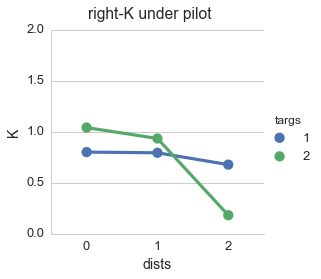

In [13]:
pilotRKPlot = sns.factorplot(data=pilotData,x='dists',y='rK',hue='targs')
pilotRKPlot.fig.suptitle('right-K under pilot')
pilotRKPlot.set_axis_labels('dists', 'K')
pilotRKPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2)

(1, 4)

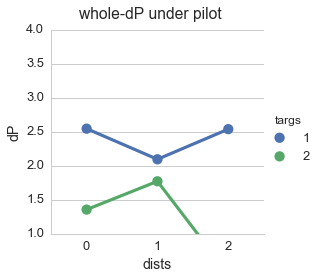

In [14]:
pilotWdPPlot = sns.factorplot(data=pilotData,x='dists',y='wdP',hue='targs')
pilotWdPPlot.fig.suptitle('whole-dP under pilot')
pilotWdPPlot.set_axis_labels('dists', 'dP')
pilotWdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(1, 4)

(0, 2.5)

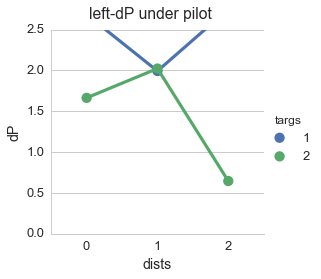

In [15]:
pilotLdPPlot = sns.factorplot(data=pilotData,x='dists',y='ldP',hue='targs')
pilotLdPPlot.fig.suptitle('left-dP under pilot')
pilotLdPPlot.set_axis_labels('dists', 'dP')
pilotLdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2.5)

(0, 2.5)

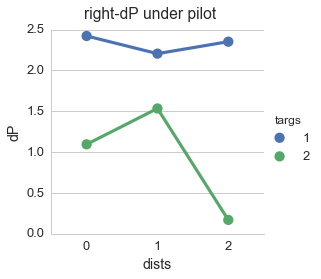

In [16]:
pilotRdPPlot = sns.factorplot(data=pilotData,x='dists',y='rdP',hue='targs')
pilotRdPPlot.fig.suptitle('right-dP under pilot')
pilotRdPPlot.set_axis_labels('dists', 'dP')
pilotRdPPlot.fig.subplots_adjust(top=.9)
plt.ylim(0, 2.5)